In [1]:
!pip install seaborn

import h5py
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import seaborn as sns
from scipy import stats
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 14

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
data_parent_dir = './../../../data/'
markers = {
    'Eigenmaps': 'D', 
    'LINE-1st':  'o', 
    'LINE-2nd':  'x', 
    'node2vec':  's'
}

linestyles = {
    'Eigenmaps': '-.', 
    'LINE-1st': '--', 
    'LINE-2nd': '-', 
    'node2vec': ':'
}

colors = {
    'Eigenmaps': '#1f77b4', 
    'LINE-1st': '#ff7f0e', 
    'LINE-2nd': '#000000', 
    'node2vec': '#2ca02c'
}

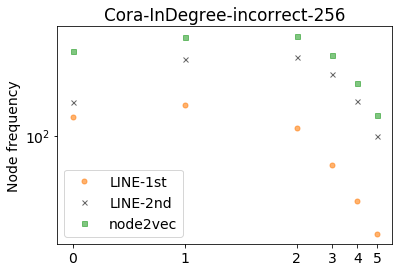

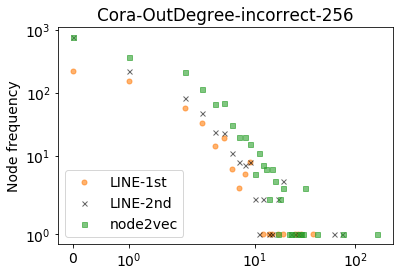

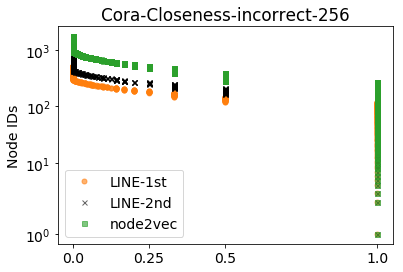

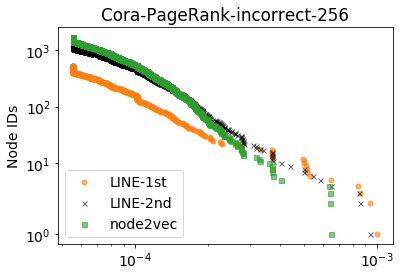

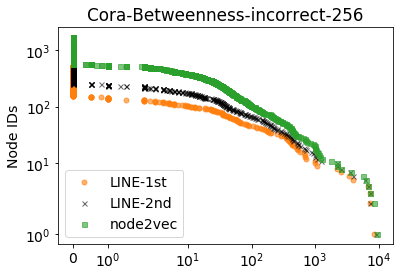

In [3]:
dname = 'Cora'
dim = '256'
property_names = ['unnormalized_in_degree', 'unnormalized_out_degree', 'unnormalized_closeness', 'pagerank', 'unnormalized_betweenness']
classification_results = pd.read_csv(data_parent_dir + 'best_result-{}.tsv'.format(dim), sep='\t')

result_df = classification_results[(classification_results['dataset'] == dname)]
data_dir = data_parent_dir + dname + '/'     

# read node properties
df = pd.read_csv(data_dir + 'node_feature.csv.as_directed')
df.replace([np.inf, -np.inf], 0., inplace=True)
num_nodes = len(df)

for r, property_name in enumerate(property_names):
    all_values = df[property_name].values

    if property_name == 'pagerank':
        property_name = 'PageRank'
    elif 'in' in property_name:
        property_name = 'InDegree'
    elif 'out' in property_name:
        property_name = 'OutDegree'
    else:
        property_name = property_name.split('_')[1].capitalize()        

    # incorrect
    for _, record in result_df.iterrows():
        param = record['param']
        model = record['model']

        nodes = np.array(list(map(int, record['incorrect_ids'].split())))
        centralities = all_values[nodes]

        if 'Degree' in property_name:                    
            # freq for discrete data
            freq_centrality = Counter(centralities)
            x, y = [c for c in sorted(freq_centrality)], [freq_centrality[c] for c in sorted(freq_centrality)]
            ylabel = 'Node frequency'
        else:
            x = sorted(centralities)
            y = np.arange(len(x))[::-1] + 1
            ylabel = 'Node IDs'

        plt.plot(x,
                 y,
                 markers[model],
                 label=model,
                 color=colors[model],
                 alpha=0.6,
                 markersize=5.)

    plt.ylabel(ylabel)
    plt.xscale('symlog')
    plt.yscale('symlog')    

    x = np.array(x)
    if property_name in ['InDegree']:
        plt.xticks(x, x)
    elif property_name in ['Closeness']:
        ids = [0, np.where(x > 0.2)[0][0], np.where(x > 0.45)[0][0], -1]
        plt.xticks(x[ids], x[ids])
    elif property_name == 'PageRank':
        ids = [0, -1]
        plt.xticks(x[ids], x[ids])
        plt.xscale('log')

    fig = plt.legend(loc=3)

    plt.savefig('../../../doc/cikm2018/images/{}-{}-{}-{}.pdf'.format(dname, property_name, 'incorrect', dim), bbox_inches='tight')
    plt.title('{}-{}-{}-{}'.format(dname, property_name, 'incorrect', dim))
    plt.show()

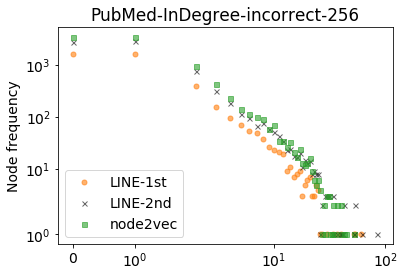

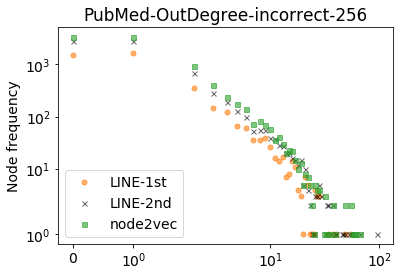

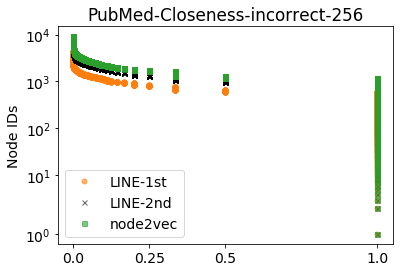

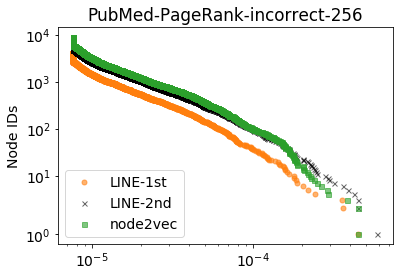

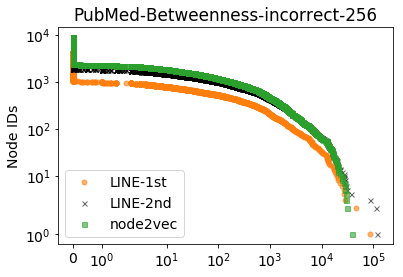

In [4]:
dname = 'PubMed'
dim = '256'
property_names = ['unnormalized_in_degree', 'unnormalized_out_degree', 'unnormalized_closeness', 'pagerank', 'unnormalized_betweenness']
classification_results = pd.read_csv(data_parent_dir + 'best_result-{}.tsv'.format(dim), sep='\t')

result_df = classification_results[(classification_results['dataset'] == dname)]
data_dir = data_parent_dir + dname + '/'     

# read node properties
df = pd.read_csv(data_dir + 'node_feature.csv.as_directed')
df.replace([np.inf, -np.inf], 0., inplace=True)
num_nodes = len(df)

for r, property_name in enumerate(property_names):
    all_values = df[property_name].values

    if property_name == 'pagerank':
        property_name = 'PageRank'
    elif 'in' in property_name:
        property_name = 'InDegree'
    elif 'out' in property_name:
        property_name = 'OutDegree'
    else:
        property_name = property_name.split('_')[1].capitalize()        

    # incorrect
    for _, record in result_df.iterrows():
        param = record['param']
        model = record['model']

        nodes = np.array(list(map(int, record['incorrect_ids'].split())))
        centralities = all_values[nodes]

        if 'Degree' in property_name:                    
            # freq for discrete data
            freq_centrality = Counter(centralities)
            x, y = [c for c in sorted(freq_centrality)], [freq_centrality[c] for c in sorted(freq_centrality)]
            ylabel = 'Node frequency'
        else:
            x = sorted(centralities)
            y = np.arange(len(x))[::-1] + 1
            ylabel = 'Node IDs'

        plt.plot(x,
                 y,
                 markers[model],
                 label=model,
                 color=colors[model],
                 alpha=0.6,
                 markersize=5.)

    plt.ylabel(ylabel)
    plt.xscale('symlog')
    plt.yscale('symlog')    

    x = np.array(x)
    if property_name in ['Closeness']:
        ids = [0, np.where(x > 0.2)[0][0], np.where(x > 0.45)[0][0], -1]
        plt.xticks(x[ids], x[ids])
    elif property_name == 'PageRank':
        ids = [0, -1]
        plt.xticks(x[ids], x[ids])
        plt.xscale('log')

    fig = plt.legend(loc=3)

    plt.savefig('../../../doc/cikm2018/images/{}-{}-{}-{}.pdf'.format(dname, property_name, 'incorrect', dim), bbox_inches='tight')
    plt.title('{}-{}-{}-{}'.format(dname, property_name, 'incorrect', dim))
    plt.show()

# Undirected Graphs

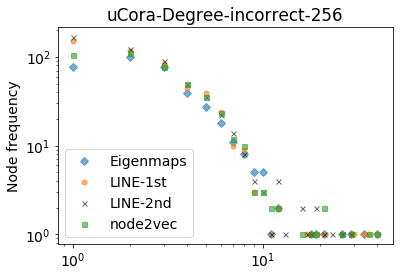

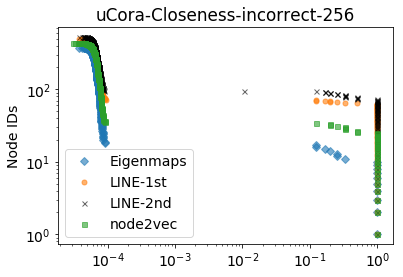

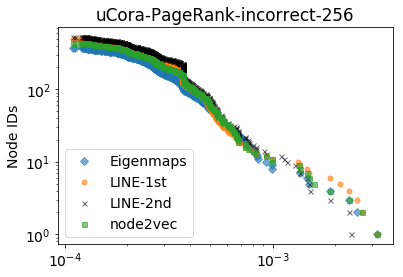

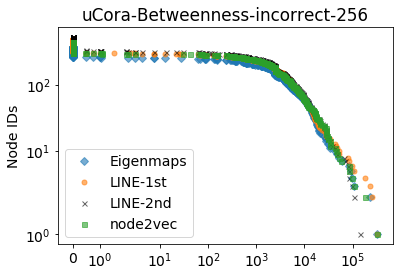

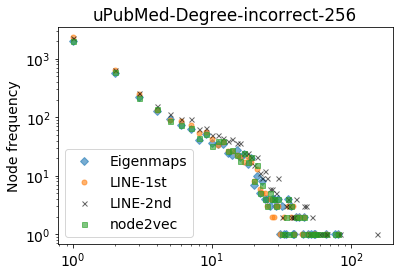

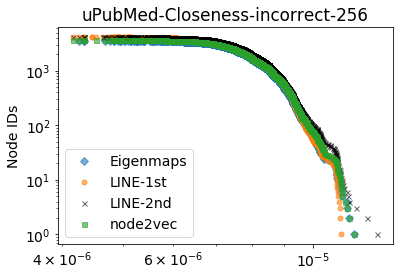

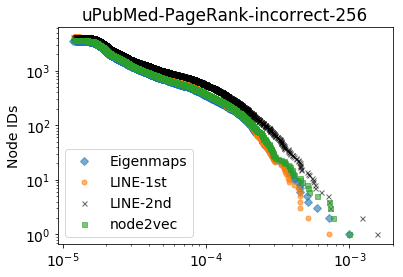

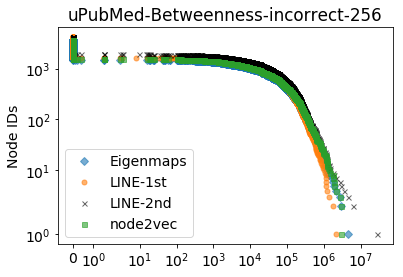

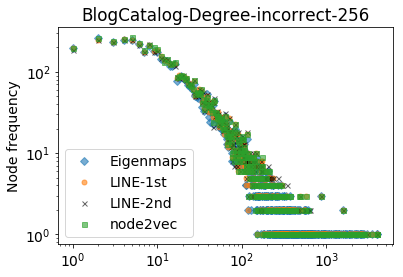

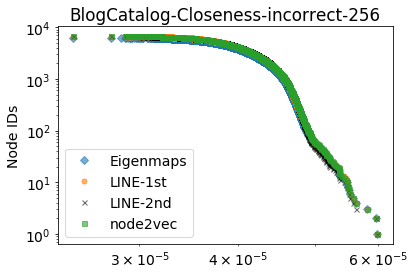

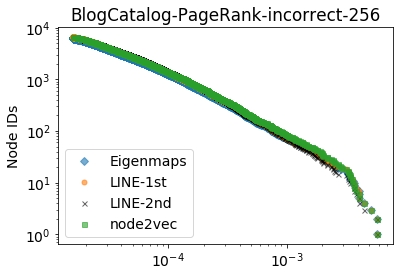

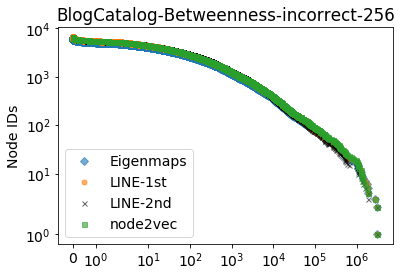

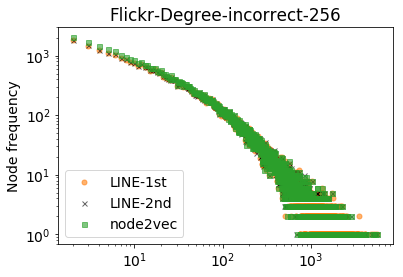

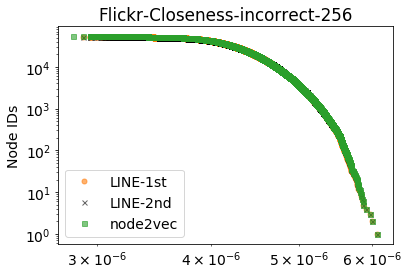

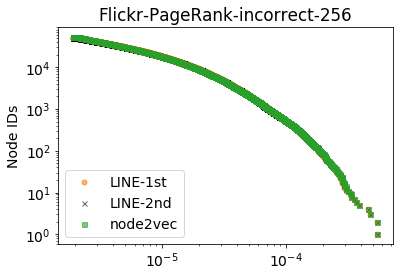

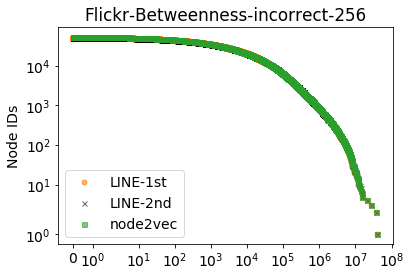

In [5]:
property_names = ['unnormalized_degree', 'unnormalized_closeness', 'pagerank', 'unnormalized_betweenness']
# dnames = ['uCora']
dnames = ['uCora', 'uPubMed', 'BlogCatalog', 'Flickr']
special_dataset_names = ['uCora', 'uPubMed']
dim = '256'

classification_results = pd.read_csv(data_parent_dir + 'best_result-{}.tsv'.format(dim), sep='\t')
classification_results.dropna(inplace=True) # remove eigenmaps result of flickr    

for dname in dnames:
    result_df = classification_results[(classification_results['dataset'] == dname)]
    if dname in special_dataset_names:
        data_dir = data_parent_dir + dname[1:] + '/'
        df = pd.read_csv(data_dir + 'node_feature.csv.as_undirected')
    else:
        data_dir = data_parent_dir + dname + '/'
        df = pd.read_csv(data_dir + 'node_feature.csv')

    num_nodes = len(df)

    for r, property_name in enumerate(property_names):
        all_values = df[property_name].values
        if property_name == 'pagerank':
            property_name = 'PageRank'
        else:
            property_name = property_name.split('_')[1].capitalize()

        # incorrect
        for _, record in result_df.iterrows():
            param = record['param']
            model = record['model']

            nodes = np.array(list(map(int, record['incorrect_ids'].split())))
            centralities = all_values[nodes]
            
            if 'Degree' == property_name:                    
                # freq for discrete data
                freq_centrality = Counter(centralities)
                x, y = [c for c in sorted(freq_centrality)], [freq_centrality[c] for c in sorted(freq_centrality)]
                ylabel = 'Node frequency'
            else:
                x = sorted(centralities)
                y = np.arange(len(x))[::-1] + 1
                ylabel = 'Node IDs'

            plt.plot(x,
                     y,
                     markers[model],
                     label=model,
                     color=colors[model],
                     alpha=0.6,
                     markersize=5.)
        
        plt.ylabel(ylabel)
        if property_name == 'Betweenness':
            plt.xscale('symlog')
            plt.yscale('symlog')
        else:
            plt.xscale('log')
            plt.yscale('log')            
        fig = plt.legend(loc=3)

        plt.savefig('../../../doc/cikm2018/images/{}-{}-{}-{}.pdf'.format(dname, property_name, 'incorrect', dim), bbox_inches='tight')
        plt.title('{}-{}-{}-{}'.format(dname, property_name, 'incorrect', dim))
        plt.show()
